In [1]:
#importing Modules

from bs4 import BeautifulSoup # to scrape data
import pandas as pd # data manipulation
import numpy as np

import matplotlib.pyplot as plt #for data visualization
import seaborn as sns

import re

In [2]:
#Question 1*** scrape and read the data
#importing my html file

with open('foodhub_orders.html', 'r') as f:
  soup = BeautifulSoup(f)

In [3]:
#finding where the data lies in the HTML file
body = soup.find('body')
print(body)

<body>
<center><h2>FoodHub Orders</h2><br/></center>
<table class="table table-bordered table-hover table-condensed">
<thead><tr><th title="Field #1">order_id</th>
<th title="Field #2">customer_id</th>
<th title="Field #3">restaurant_name</th>
<th title="Field #4">cuisine_type</th>
<th title="Field #5">cost_of_the_order</th>
<th title="Field #6">day_of_the_week</th>
<th title="Field #7">rating</th>
<th title="Field #8">food_preparation_time</th>
<th title="Field #9">delivery_time</th>
</tr></thead>
<tbody><tr>
<td align="right">1477147</td>
<td align="right">337525</td>
<td>Hangawi</td>
<td>Korean</td>
<td align="right">30.75</td>
<td>Weekend</td>
<td>Not given</td>
<td align="right">25</td>
<td align="right">20</td>
</tr>
<tr>
<td align="right">1477685</td>
<td align="right">358141</td>
<td>Blue Ribbon Sushi Izakaya</td>
<td>Japanese</td>
<td align="right">12.08</td>
<td>Weekend</td>
<td>Not given</td>
<td align="right">25</td>
<td align="right">23</td>
</tr>
<tr>
<td align="right">14

In [4]:
td_list = body.find_all("td")
td_list

[<td align="right">1477147</td>,
 <td align="right">337525</td>,
 <td>Hangawi</td>,
 <td>Korean</td>,
 <td align="right">30.75</td>,
 <td>Weekend</td>,
 <td>Not given</td>,
 <td align="right">25</td>,
 <td align="right">20</td>,
 <td align="right">1477685</td>,
 <td align="right">358141</td>,
 <td>Blue Ribbon Sushi Izakaya</td>,
 <td>Japanese</td>,
 <td align="right">12.08</td>,
 <td>Weekend</td>,
 <td>Not given</td>,
 <td align="right">25</td>,
 <td align="right">23</td>,
 <td align="right">1477070</td>,
 <td align="right">66393</td>,
 <td>Cafe Habana</td>,
 <td>Mexican</td>,
 <td align="right">12.23</td>,
 <td>Weekday</td>,
 <td>5</td>,
 <td align="right">23</td>,
 <td align="right">28</td>,
 <td align="right">1477334</td>,
 <td align="right">106968</td>,
 <td>Blue Ribbon Fried Chicken</td>,
 <td>American</td>,
 <td align="right">29.2</td>,
 <td>Weekend</td>,
 <td>3</td>,
 <td align="right">25</td>,
 <td align="right">15</td>,
 <td align="right">1478249</td>,
 <td align="right">76942

In [5]:
unedited_list = []

for item in td_list:
    print(item.get_text())
    unedited_list.append(item.get_text())

1477147
337525
Hangawi
Korean
30.75
Weekend
Not given
25
20
1477685
358141
Blue Ribbon Sushi Izakaya
Japanese
12.08
Weekend
Not given
25
23
1477070
66393
Cafe Habana
Mexican
12.23
Weekday
5
23
28
1477334
106968
Blue Ribbon Fried Chicken
American
29.2
Weekend
3
25
15
1478249
76942
Dirty Bird to Go
American
11.59
Weekday
4
25
24
1477224
147468
Tamarind TriBeCa
Indian
25.22
Weekday
3
20
24
1477894
157711
The Meatball Shop
Italian
6.07
Weekend
Not given
28
21
1477859
89574
Barbounia
Mediterranean
5.97
Weekday
3
33
30
1477174
121706
Anjappar Chettinad
Indian
16.44
Weekday
5
21
26
1477311
39705
Bukhara Grill
Indian
7.18
Weekday
5
29
26
1477895
143926
Big Wong Restaurant ÂŒ_Â¤Â¾Ã‘Â¼
Chinese
5.92
Weekday
Not given
34
28
1478437
221206
Empanada Mama (closed)
Mexican
8.1
Weekend
5
23
22
1476966
129969
Blue Ribbon Fried Chicken
American
24.3
Weekend
5
23
17
1477449
104548
Pylos
Mediterranean
11.3
Weekend
3
24
23
1478198
62667
Lucky's Famous Burgers
American
12.13
Weekday
Not given
23
30
1477414
6

4
25
26
1478210
320493
Vanessa's Dumplings
Chinese
29.2
Weekday
Not given
27
30
1477887
69348
RedFarm Broadway
Chinese
11.64
Weekend
3
26
21
1478366
270149
Samurai Mama
Japanese
11.64
Weekend
5
21
18
1478279
354016
Waverly Diner
American
19.4
Weekend
5
25
23
1476819
104548
Tarallucci e Vino Restaurant
Italian
29.1
Weekday
Not given
28
33
1477394
105754
Momoya
Japanese
14.02
Weekday
4
24
30
1476667
157578
P.J. Clarke's
American
6.11
Weekend
4
27
25
1476975
350373
Blue Ribbon Fried Chicken
American
12.23
Weekend
4
21
26
1477909
47440
Blue Ribbon Fried Chicken
American
12.18
Weekend
Not given
31
23
1476579
85633
The Meatball Shop
Italian
24.2
Weekend
5
24
24
1477286
110091
The Meatball Shop
Italian
12.18
Weekend
Not given
27
17
1478436
95164
Amma
Indian
17.03
Weekend
Not given
28
19
1476685
96877
The Meatball Shop
Italian
22.26
Weekday
4
30
26
1477912
261400
The Meatball Shop
Italian
19.45
Weekday
5
31
32
1476892
177078
Lantern Thai Kitchen
Thai
21.93
Weekday
Not given
22
25
1476882
68429

5
23
31
1477919
75484
Five Guys Burgers and Fries
American
29.15
Weekend
Not given
20
16
1478120
47440
Blue Ribbon Fried Chicken
American
8.1
Weekend
Not given
33
22
1477791
300549
Shake Shack
American
7.23
Weekend
3
29
18
1477806
195927
Boqueria
Spanish
12.66
Weekend
Not given
27
30
1477631
115519
The Meatball Shop
Italian
12.23
Weekend
4
31
28
1477566
211697
Shake Shack
American
9.07
Weekday
4
21
32
1477156
93797
ilili Restaurant
Middle Eastern
6.02
Weekday
Not given
27
29
1478136
61388
Five Guys Burgers and Fries
American
14.12
Weekend
4
27
27
1477690
370096
Melt Shop
American
21.93
Weekend
5
30
18
1477237
59217
Jack's Wife Freda
Mediterranean
16.15
Weekend
4
26
22
1477107
211697
Shake Shack
American
7.08
Weekend
4
25
23
1478108
87188
Momoya
Japanese
32.93
Weekday
3
28
27
1478047
127934
Blue Ribbon Fried Chicken
American
12.13
Weekend
Not given
20
26
1477535
125123
S'MAC
American
15.57
Weekend
5
34
28
1477517
77793
The Meatball Shop
Italian
29.15
Weekend
5
23
30
1478029
403019
S'MAC

Italian
24.2
Weekend
5
31
15
1477210
182080
Shake Shack
American
14.65
Weekday
Not given
26
33
1477873
370053
Shake Shack
American
12.08
Weekend
3
29
24
1477858
60052
Rubirosa
Italian
5.77
Weekend
Not given
27
21
1477788
270444
P.J. Clarke's
American
4.71
Weekend
Not given
23
15
1476711
106968
Blue Ribbon Fried Chicken
American
8.78
Weekend
Not given
22
26
1477997
186473
Blue Ribbon Sushi Izakaya
Japanese
12.23
Weekend
3
34
25
1477523
53503
RedFarm Broadway
Chinese
12.23
Weekend
4
21
21
1476572
356195
Blue Ribbon Fried Chicken
American
29.15
Weekday
5
20
29
1476895
105460
Burger Joint
American
13.1
Weekend
Not given
22
18
1478236
121905
Chipotle Mexican Grill $1.99 Delivery
Mexican
22.26
Weekend
4
21
21
1476628
70456
Parm
Italian
12.56
Weekday
Not given
32
28
1476927
62626
Sushi of Gari 46
Japanese
13.05
Weekend
Not given
24
22
1477547
242754
Rubirosa
Italian
13.92
Weekend
Not given
29
27
1478349
229946
Balthazar Boulangerie
French
21.39
Weekend
Not given
35
29
1477850
216438
Blue Ribb

143511
Chipotle Mexican Grill $1.99 Delivery
Mexican
16.44
Weekday
Not given
33
30
1478430
133701
The Loop
Japanese
24.3
Weekend
5
21
29
1477160
61181
The Meatball Shop
Italian
8.63
Weekday
4
28
27
1477605
91907
Momoya
Japanese
9.02
Weekend
Not given
21
30
1478351
78939
Blue Ribbon Sushi
Japanese
12.08
Weekend
5
31
16
1477017
175101
TAO
Japanese
15.76
Weekend
Not given
26
19
1478202
345429
Burger Joint
American
21.88
Weekend
5
26
24
1478053
125262
Barbounia
Mediterranean
5.77
Weekend
Not given
23
23
1476933
375704
Shake Shack
American
32.98
Weekend
3
22
21
1476656
124596
RedFarm Hudson
Chinese
29.1
Weekday
Not given
27
26
1478071
70315
Five Guys Burgers and Fries
American
14.12
Weekend
4
28
25
1476800
183520
Blue Ribbon Sushi
Japanese
11.59
Weekend
Not given
26
23
1477568
296554
Blue Ribbon Fried Chicken
American
9.75
Weekday
5
23
32
1478332
146456
Five Guys Burgers and Fries
American
12.18
Weekend
Not given
22
26
1477504
71613
Empanada Mama (closed)
Mexican
15.57
Weekend
4
24
20
14775

Weekend
5
31
27
1477902
91114
Shake Shack
American
15.77
Weekend
4
35
23
1477416
123977
Vezzo Thin Crust Pizza
Italian
22.26
Weekday
Not given
22
32
1476833
388420
Sushi of Gari 46
Japanese
9.02
Weekend
5
32
17
1476813
261665
Han Dynasty
Chinese
7.71
Weekend
5
22
18
1477907
213212
Blue Ribbon Fried Chicken
American
14.65
Weekend
Not given
34
23
1477668
160957
Han Dynasty
Chinese
22.31
Weekend
5
29
15
1477306
94691
brgr
American
5.72
Weekday
3
24
26
1478257
41877
Cafe Mogador
Middle Eastern
6.69
Weekend
4
23
30
1477662
6987
Hill Country Fried Chicken
Southern
29.78
Weekday
Not given
35
33
1478161
52327
Sushi of Gari
Japanese
16.01
Weekend
Not given
33
19
1478225
142574
Sushi of Gari
Japanese
15.96
Weekend
Not given
22
19
1476839
107909
Shake Shack
American
14.07
Weekend
Not given
33
21
1477847
106478
Blue Ribbon Sushi
Japanese
24.25
Weekday
4
22
29
1476718
35643
Vanessa's Dumpling House
Chinese
14.84
Weekend
5
31
24
1478429
355090
Shake Shack
American
22.85
Weekend
5
24
23
1476885
13334

Not given
25
26
1477950
301032
Blue Ribbon Fried Chicken
American
16.44
Weekend
4
24
16
1476679
241719
Blue Ribbon Sushi Izakaya
Japanese
14.41
Weekend
5
22
20
1478388
285143
Pepe Rosso To Go
Italian
12.13
Weekend
4
25
18
1478078
54608
Tamarind TriBeCa
Indian
22.26
Weekend
5
34
15
1477443
105903
Shake Shack
American
24.3
Weekday
4
35
29
1477272
143984
The Smile
American
12.27
Weekday
Not given
32
24
1476868
122609
Blue Ribbon Sushi Izakaya
Japanese
12.23
Weekend
Not given
33
23
1478432
331143
Waverly Diner
American
14.6
Weekday
3
20
32
1476988
94115
Moonstruck on Second
American
14.94
Weekend
5
27
20
1476762
367111
Blue Ribbon Sushi Bar & Grill
Japanese
16.54
Weekend
Not given
27
17
1477925
347181
RedFarm Hudson
Chinese
11.64
Weekend
Not given
34
18
1478145
42461
Melt Shop
American
11.69
Weekday
4
21
27
1477042
209179
RedFarm Broadway
Chinese
6.74
Weekend
Not given
31
27
1476834
176622
Cafe Mogador
Middle Eastern
9.22
Weekend
Not given
23
15
1477446
88333
The Meatball Shop
American
5.7

Not given
27
24
1477166
402215
RedFarm Hudson
Chinese
21.29
Weekend
4
32
25
1477338
81110
Hill Country Fried Chicken
Southern
11.64
Weekend
4
35
21
1477003
120833
Bareburger
American
32.93
Weekend
Not given
29
24
1477565
65009
Blue Ribbon Fried Chicken
American
12.56
Weekday
5
27
27
1477842
299221
RedFarm Broadway
Chinese
14.07
Weekday
Not given
35
33
1478328
58898
Rubirosa
Italian
33.03
Weekend
5
22
28
1477289
72322
Cafe Mogador
Middle Eastern
12.95
Weekend
3
21
20
1478146
207281
Shake Shack
American
12.27
Weekend
5
24
28
1476662
115213
Tamarind TriBeCa
Indian
12.18
Weekend
5
25
20
1476991
81828
The Meatball Shop
Italian
12.08
Weekend
3
32
19
1477433
283331
Dickson's Farmstand Meats
American
12.18
Weekend
5
21
20
1478250
369272
Blue Ribbon Sushi
Japanese
12.22
Weekend
Not given
34
28
1478239
400390
Shake Shack
American
12.95
Weekend
4
30
26
1477370
89889
Sushi of Gari 46
Japanese
29.1
Weekday
5
32
30
1477580
79849
Chipotle Mexican Grill $1.99 Delivery
Mexican
15.23
Weekend
Not given
3

23
30
1477562
93113
The Odeon
American
6.69
Weekend
4
30
20
1476847
114085
The Meatball Shop
Italian
24.3
Weekend
4
29
15
1477081
222734
Shake Shack
American
24.25
Weekday
Not given
23
30
1476604
126798
Cafe Mogador
Middle Eastern
19.45
Weekday
4
23
29
1478016
154471
Yama Japanese Restaurant
Japanese
9.65
Weekend
5
24
16
1477087
206039
Shake Shack
American
12.66
Weekend
5
25
15
1476706
327651
Hunan Manor
Chinese
5.72
Weekday
5
31
26
1477906
66012
Sushi of Gari Tribeca
Japanese
19.02
Weekend
5
27
29
1478381
111909
Ravagh Persian Grill
Middle Eastern
16.06
Weekend
Not given
28
21
1478142
114085
Hatsuhana
Japanese
29.15
Weekend
3
33
28
1477654
301032
Blue Ribbon Fried Chicken
American
12.13
Weekend
5
25
29
1477965
384411
Shake Shack
American
19.45
Weekday
3
24
29
1476960
45577
Parm
Italian
21.83
Weekday
Not given
23
32
1478134
82041
Sushi of Gari Tribeca
Japanese
21.83
Weekday
Not given
34
30
1477588
286386
5 Napkin Burger
American
29.05
Weekend
3
26
21
1477897
79507
The Meatball Shop
Ita

12.18
Weekday
5
23
31
1478056
120353
Blue Ribbon Sushi
Japanese
19.45
Weekend
Not given
28
24


In [6]:
# Taking unedited list and slicing in order to get the columns for the dataframe

def slice_to_row(data_slice):
    rating = data_slice[6]
    if rating == 'Not given':
        rating = None
    else:
        rating = int(rating)

    return (
        int(data_slice[0]),
        int(data_slice[1]),
        data_slice[2],
        data_slice[3],
        float(data_slice[4]),
        data_slice[5],
        rating,
        int(data_slice[7]),
        int(data_slice[8])
    )


def transform_to_rows(data_list):
    rows = []
    for i in range(0, len(data_list), 9):
        rows.append(slice_to_row(data_list[i:i+9]))
    return rows

data_rows = transform_to_rows(unedited_list)
data_rows
        


[(1477147, 337525, 'Hangawi', 'Korean', 30.75, 'Weekend', None, 25, 20),
 (1477685,
  358141,
  'Blue Ribbon Sushi Izakaya',
  'Japanese',
  12.08,
  'Weekend',
  None,
  25,
  23),
 (1477070, 66393, 'Cafe Habana', 'Mexican', 12.23, 'Weekday', 5, 23, 28),
 (1477334,
  106968,
  'Blue Ribbon Fried Chicken',
  'American',
  29.2,
  'Weekend',
  3,
  25,
  15),
 (1478249, 76942, 'Dirty Bird to Go', 'American', 11.59, 'Weekday', 4, 25, 24),
 (1477224, 147468, 'Tamarind TriBeCa', 'Indian', 25.22, 'Weekday', 3, 20, 24),
 (1477894,
  157711,
  'The Meatball Shop',
  'Italian',
  6.07,
  'Weekend',
  None,
  28,
  21),
 (1477859, 89574, 'Barbounia', 'Mediterranean', 5.97, 'Weekday', 3, 33, 30),
 (1477174,
  121706,
  'Anjappar Chettinad',
  'Indian',
  16.44,
  'Weekday',
  5,
  21,
  26),
 (1477311, 39705, 'Bukhara Grill', 'Indian', 7.18, 'Weekday', 5, 29, 26),
 (1477895,
  143926,
  'Big Wong Restaurant ÂŒ_Â¤Â¾Ã‘Â¼',
  'Chinese',
  5.92,
  'Weekday',
  None,
  34,
  28),
 (1478437,
  221206,

In [7]:
df = pd.DataFrame(data_rows, columns=['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time'])
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31


In [8]:
#Question 2 for the shape of the data set
df.shape

(1898, 9)

In [9]:
#Question 3 for the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [10]:
#Question 4 execution
#for loop to change 3 columns from object type to category

for col in ['restaurant_name', 'cuisine_type', 'day_of_the_week']:
    df[col] = df[col].astype('category')

In [11]:
#Question 4 result
#restaurant, cuisine type, and day now reflect as a category instead of an object

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1162 non-null   float64 
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(2), int64(4)
memory usage: 102.7 KB


In [12]:
#Question 5 these are the statistics of the numeric data within the dataframe

df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


-  An Average order is 16.50 from 1898 orders

-  With a range from 4.47 to 35.41
-  Average Rating is a 4.34
-  Food prep on average takes 27 minutes
-  Delivery time is about 24 minutes on average

In [13]:
df.describe(include=['object','category'])

,restaurant_name,cuisine_type,day_of_the_week
count,1898,1898,1898
unique,178,14,2
top,Shake Shack,American,Weekend
freq,219,584,1351


In [14]:
#Question 6 number of orders that are not rated

df['rating'].isna().sum()

736

In [15]:
#Question 7 going to plot out several different things to see if i find anything interesting

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

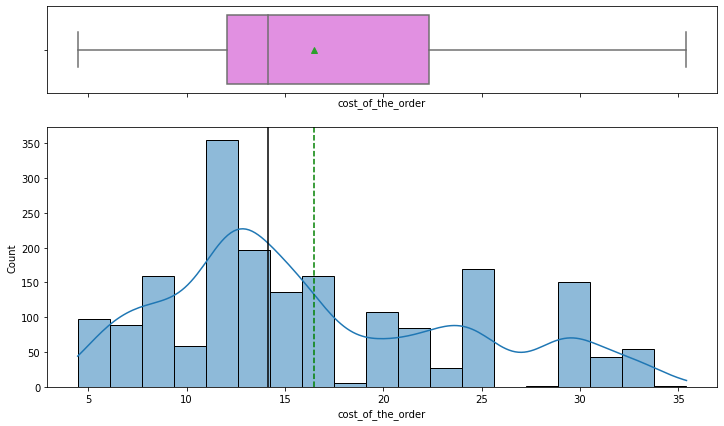

In [16]:
#this shows that the median oder is about 14$ and mean is alittle over 16$ and data is a bit right skewed

histogram_boxplot(df, 'cost_of_the_order', kde=True)

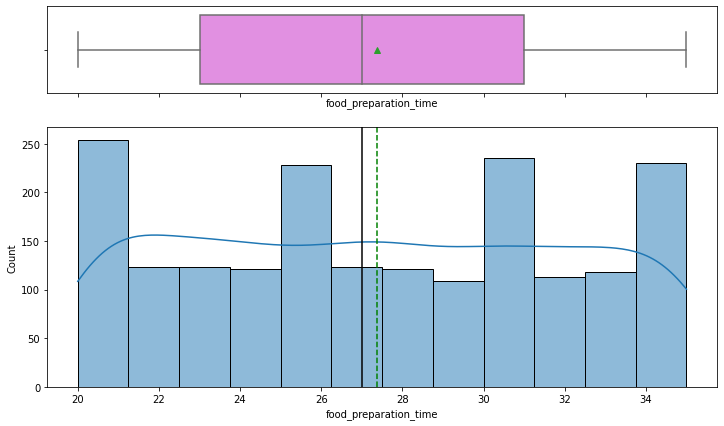

In [17]:
#very flat data median and mean both sit around 27 minutes for food prep time

histogram_boxplot(df, 'food_preparation_time', kde=True)

In [18]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 720x504 with 0 Axes>

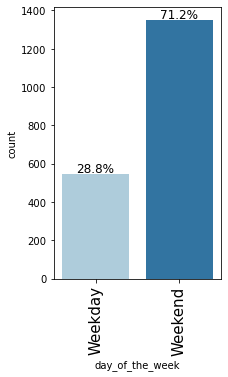

In [19]:
#71.2% of orders are done on the weekend which is a significant amount

plt.figure(figsize=(10,7))
labeled_barplot(df, 'day_of_the_week', perc=True)

<Figure size 720x504 with 0 Axes>

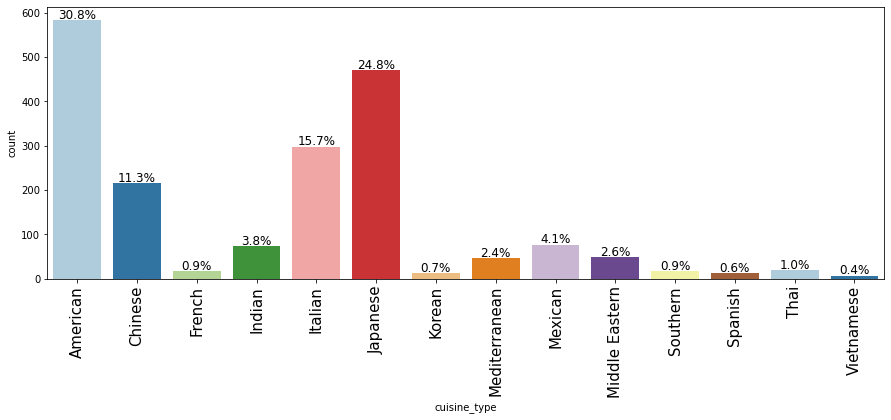

In [21]:
#this plot shows most popular cuisine types 4 really stand out over the rest

plt.figure(figsize=(10,7))
labeled_barplot(df, 'cuisine_type', perc=True)

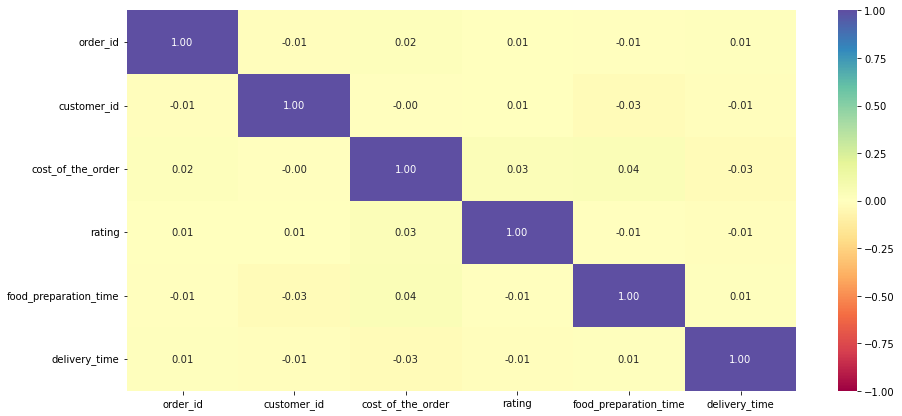

In [22]:
#no hot spots to really view

num_var = ['order_id','customer_id','restaurant_name','cuisine_type','cost_of_the_order', 'day_of_the_week','rating', 'food_preparation_time', 'delivery_time']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [23]:
#Question 8 Top 5 restaurants based on number of orders recieved

print (df.groupby('restaurant_name')['order_id'].nunique().sort_values(ascending=False)[:5])

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


In [24]:
#Question 9 most popular cuisine on the Weekends

wknd_orders = df.loc[df.day_of_the_week=='Weekend']
wknd_orders['cuisine_type'].value_counts()[:5]

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

In [25]:
#Question 10 number orders over $20 and the percent from dataset

greater_20 = len(df.loc[df.cost_of_the_order > 20])
greater_20_percent = greater_20 / len(df)
print('Number of orders over $20 is:',greater_20)
print('The percent of orders more than $20 is:',"{:.0%}".format(greater_20_percent))

Number of orders over $20 is: 555
The percent of orders more than $20 is: 29%


In [26]:
#Question 11 average delivey time 

avg_del_time = df['delivery_time'].mean()
print("Average delivery time is","{:.2f}".format(avg_del_time),'minutes')

Average delivery time is 24.16 minutes


In [27]:
#Question 12 how to find largest order and then pull details of that order in order to award a $15 dollar coupon

max_order = df.cost_of_the_order.max() #to find the largest order paid
top_spender = int(df['order_id'].where(df['cost_of_the_order'] == max_order).dropna().values[0]) #to find order id
df.loc[df["order_id"] == top_spender] #to pull entire row showing full order details

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4.0,21,29


In [28]:
#Question 13
correlation = df.corr()
correlation

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,0.006308,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,0.007753,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.033983,0.041527,-0.029949
rating,0.006308,0.007753,0.033983,1.000000,-0.006083,-0.009804
food_preparation_time,-0.007026,-0.030330,0.041527,-0.006083,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,-0.009804,0.011094,1.000000


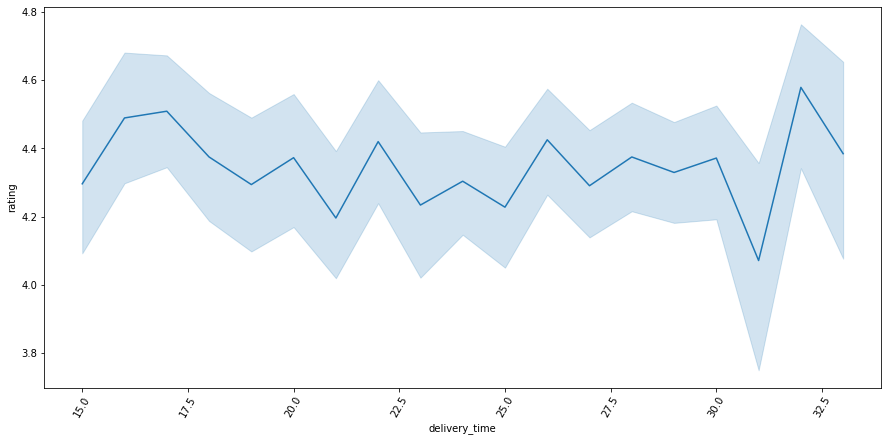

In [29]:
#no strong correlation between delivery time and rating

plt.figure(figsize=(15,7))
sns.lineplot(data=df, y='rating', x='delivery_time', palette='PuBu');
plt.xticks(rotation=60)
plt.show()

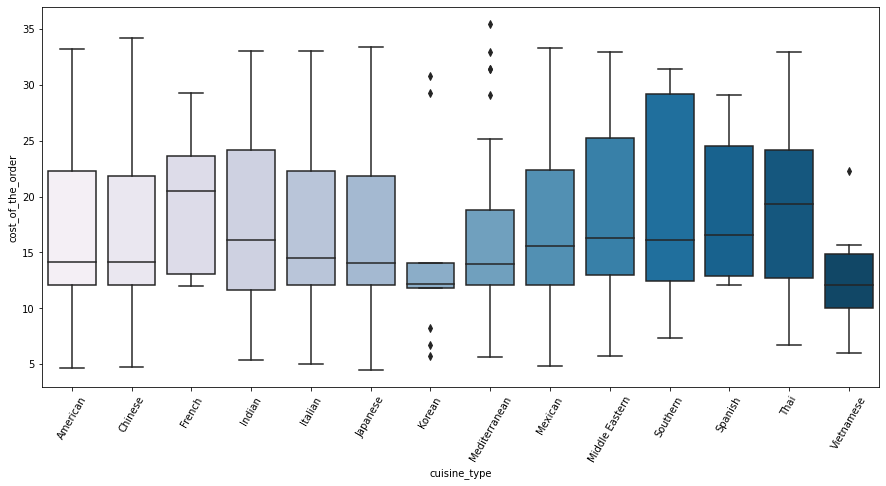

In [30]:
#largest IQR is cuisine type shows "southern", highest median being"French"

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='PuBu');
plt.xticks(rotation=60)
plt.show()

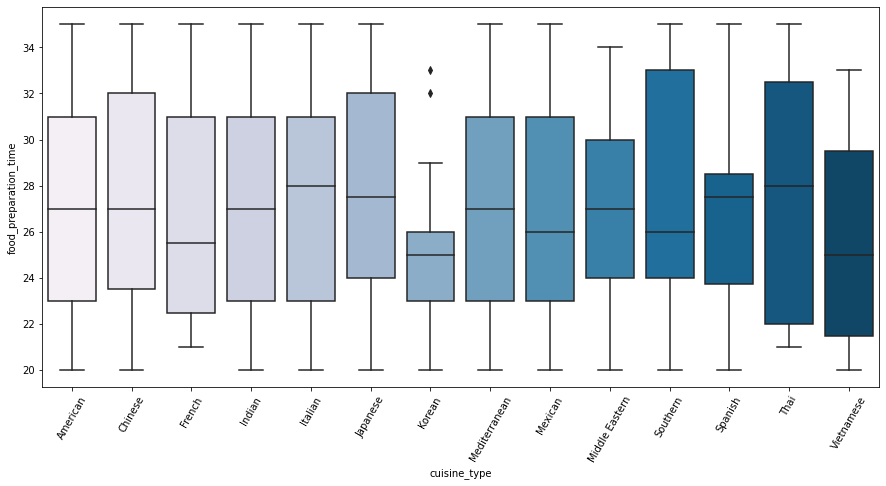

In [31]:
#all types prepare their meal in a relatively similar span of time except "Korean" being the quickest

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', palette='PuBu');
plt.xticks(rotation=60)
plt.show()

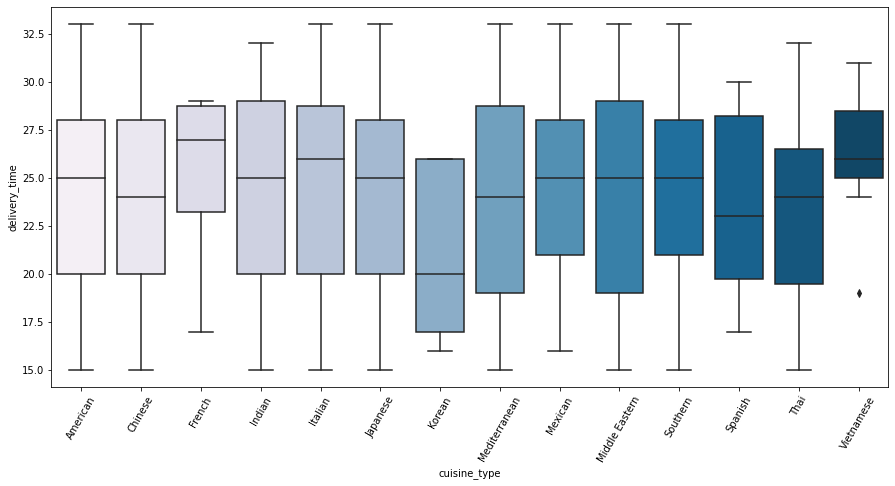

In [32]:
#delivery time seems to be relatively similar as well

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time', palette='PuBu');
plt.xticks(rotation=60)
plt.show()

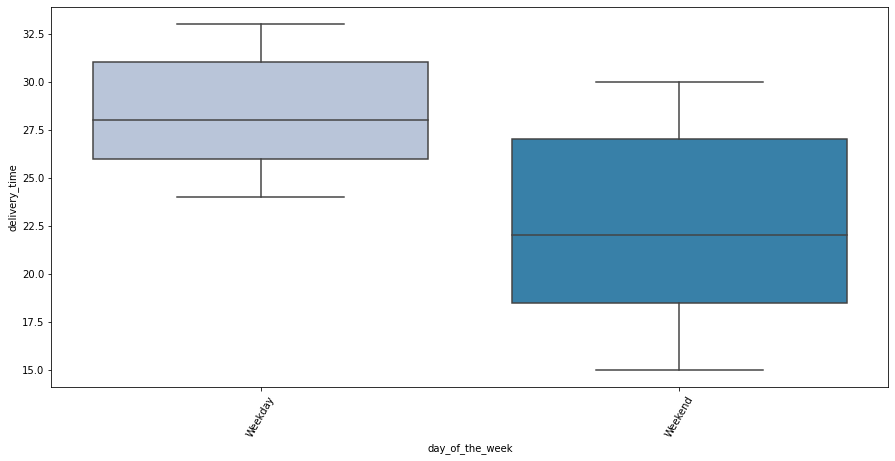

In [33]:
#delivery time is higher during the week which interesting since weekdays are slower in terms of business

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', palette='PuBu');
plt.xticks(rotation=60)
plt.show()

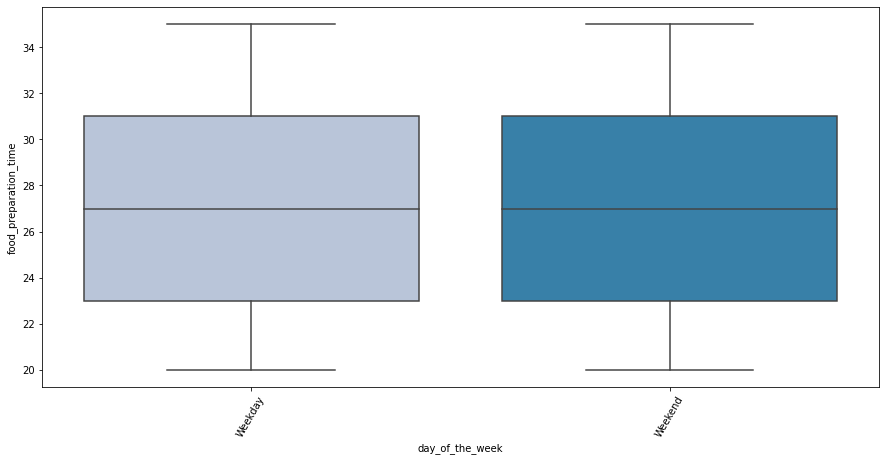

In [34]:
#exactly the same

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time', palette='PuBu');
plt.xticks(rotation=60)
plt.show()

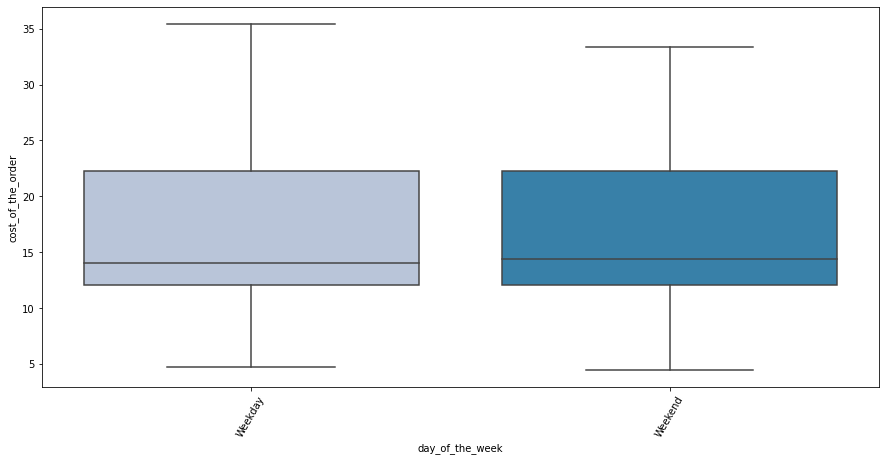

In [35]:
#exactly the same 

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', palette='PuBu');
plt.xticks(rotation=60)
plt.show()

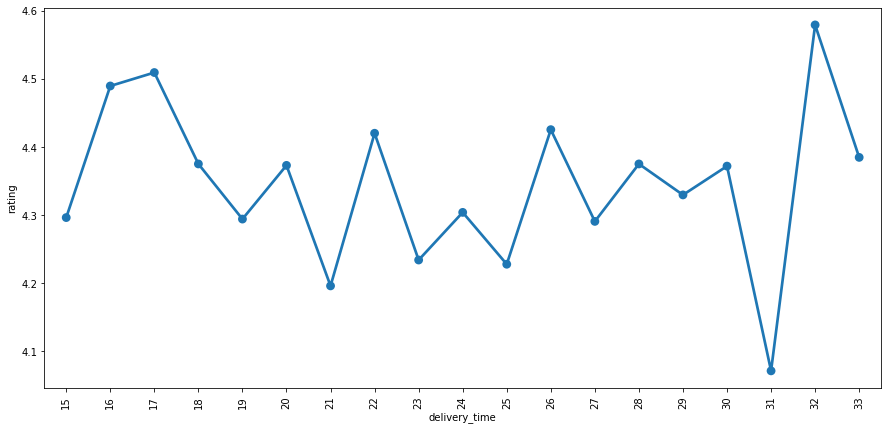

In [36]:
#no strong correlation between delivery time and rating

plt.figure(figsize=(15, 7))

sns.pointplot(x='delivery_time', y='rating', data=df, estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.show()

In [37]:
#Question 14 restaurants that will recieve promo offer because of 50+ ratings and average rating greater than 4.0

average_ratings = df.groupby('restaurant_name')['rating'].transform('mean')
rating_count = df.groupby('restaurant_name')['rating'].transform('count')
cond = (average_ratings > 4) & (rating_count > 50)

promo_list = df.loc[cond]['restaurant_name'].unique()
print('These restaurants below are eligible for the promotional offer!')
for restaurant in promo_list:
    print(restaurant)


These restaurants below are eligible for the promotional offer!
Blue Ribbon Fried Chicken
The Meatball Shop
Shake Shack
Blue Ribbon Sushi


In [38]:
#Question 15 Calculating net revenues depending on amount the orders cost 25% on orders >20$ and 15% on orders >5$

upcharge = []

for x in df['cost_of_the_order']:
    if x > 20:
        upcharge.append(x * .25)
    elif x > 5:
        upcharge.append(x * .15)
    else:
        upcharge.append(0.00)
    
df['upcharge'] = upcharge
net_rev = df['upcharge'].sum()
print('The net revenue recieved from these orders is:',"{:.2f}".format(net_rev))

The net revenue recieved from these orders is: 6166.30


In [39]:
#question 16 pt.1
df['total_wait_time'] = df['food_preparation_time'] + df['delivery_time']
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,upcharge,total_wait_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385,49
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,5.5775,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,1.8270,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24,6.3050,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31,1.8270,54


In [40]:
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,upcharge,total_wait_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749,3.248842,51.533720
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637,2.295598,6.833603
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000,0.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000,1.812000,47.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000,2.121000,52.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000,5.574375,56.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000,8.852500,68.000000


In [41]:
#Question 16 pt.2

over_60 = df.loc[df.total_wait_time > 60]        
final_value = len(over_60)/len(df)

print("The percent of orders that have taken over 60 minutes is","{:.2%}".format(final_value))

The percent of orders that have taken over 60 minutes is 10.54%


In [42]:
#Question 17

we_mdt = df.loc[df.day_of_the_week=='Weekend']
we_mean = we_mdt['delivery_time'].mean()

wd_mdt = df.loc[df.day_of_the_week=='Weekday']
wd_mean = wd_mdt['delivery_time'].mean()

print(f'Weekday averaged delivery time is approx. {wd_mean:.2f} and weekend averaged delivery time is approx. {we_mean:.2f}')

Weekday averaged delivery time is approx. 28.34 and weekend averaged delivery time is approx. 22.47


#Question 18

My recommendation would be to focus on weekends which are the main time for orders,

I would increase the parameters of the app to record more items like timestamps and better rating system,

I would also record distance on delivery 

I would market this app to American , Japanese, Italian, and Chinese restaraunts due to those businesses tend to do well,

